# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

## Data Importing and Cleaning

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data from csv
df= pd.read_csv('Wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [305]:
df_column_names = df.columns.to_list()

In [306]:
# Check dtypes
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [307]:
# Check for nulls
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [308]:
# Get summary stats for all colums 
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [309]:
#dealing wiht outliers
lower_limit = df.quantile(0.05)
upper_limit = df.quantile(0.95)

df = df.clip(lower=lower_limit, upper=upper_limit, axis=1)

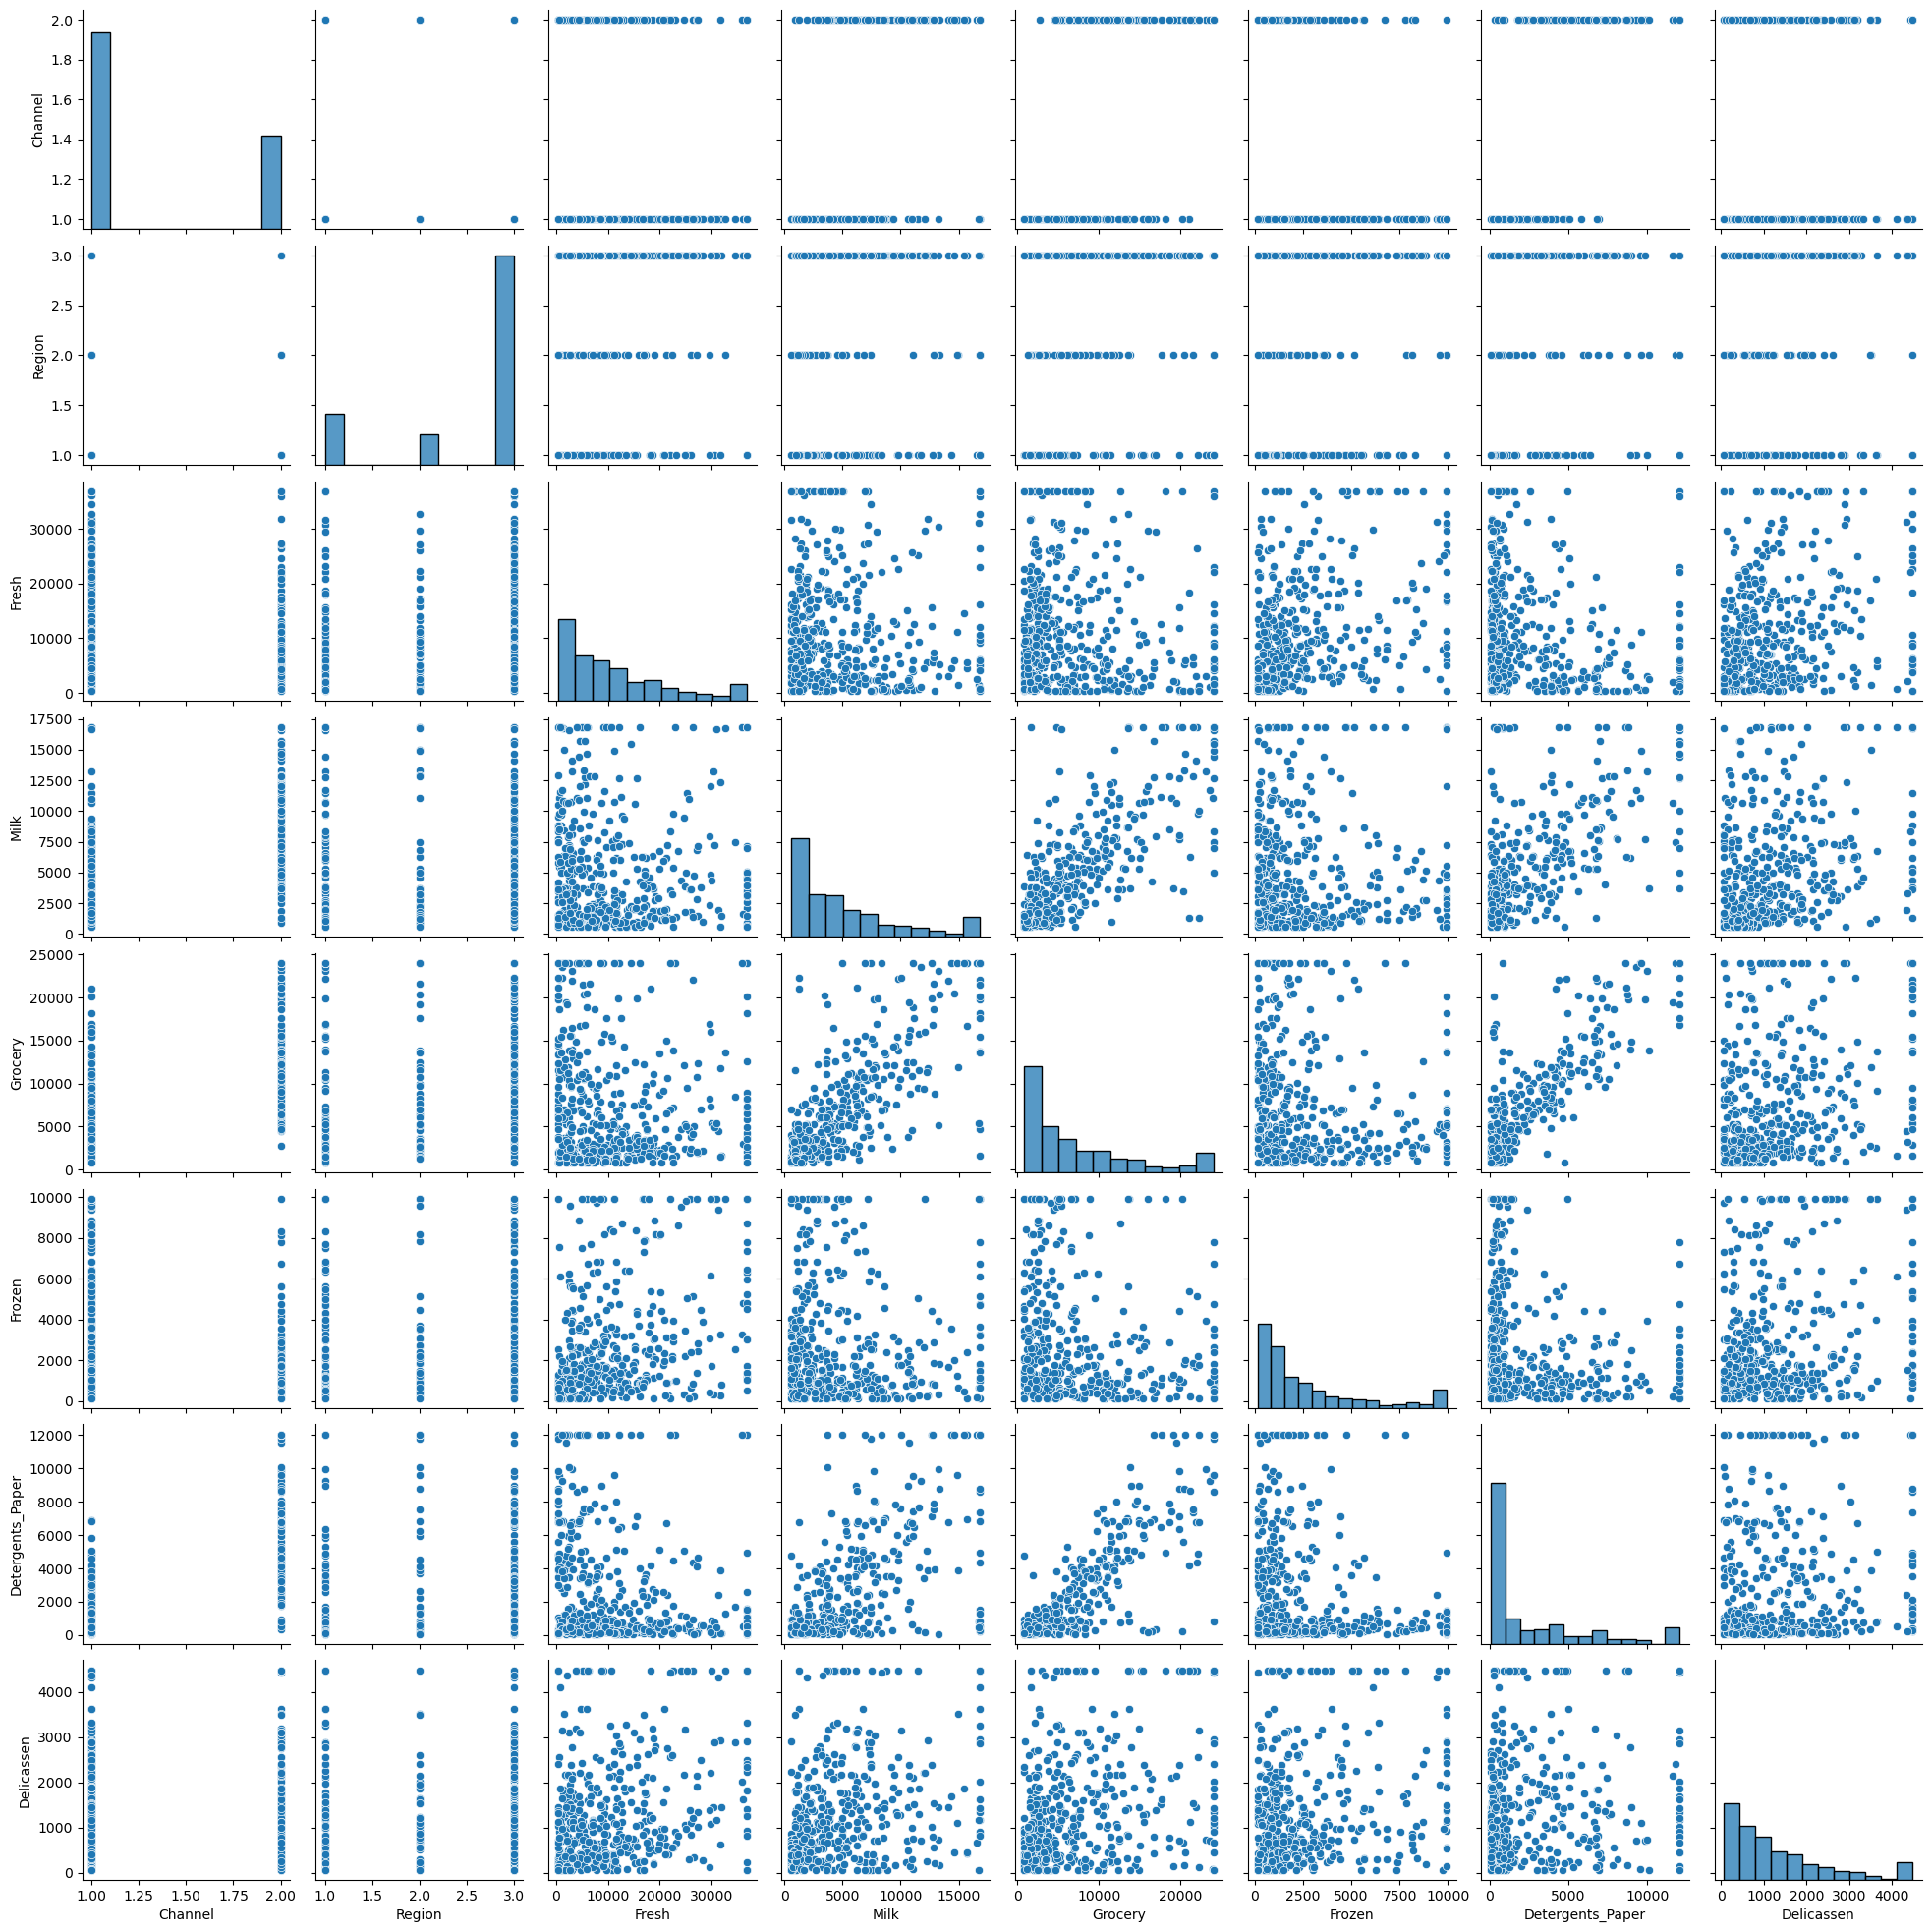

In [310]:
import seaborn as sns
# look for relationships between features
sns.pairplot(df)

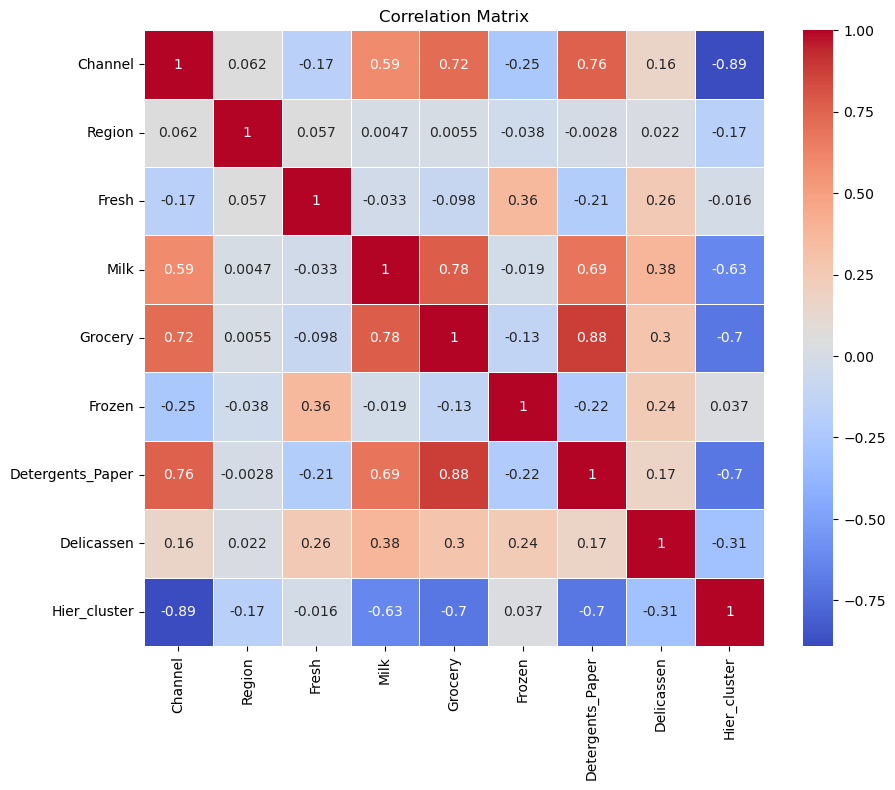

<Figure size 640x480 with 0 Axes>

In [355]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
plt.savefig('Images/Correlation_Matrix.png')

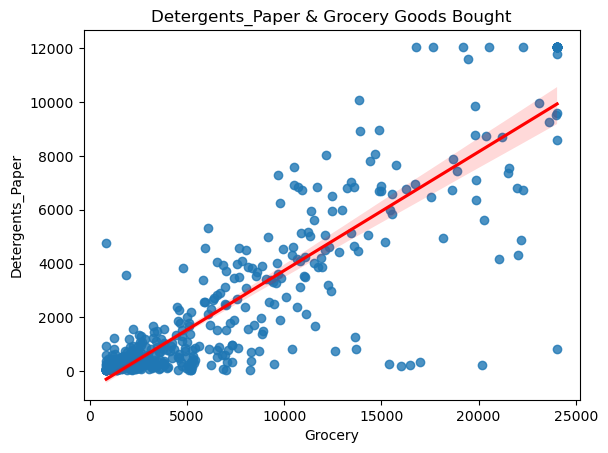

In [354]:
# visualize relationship between Grocery and Detergents_Paper
sns.regplot(df,x='Grocery',y='Detergents_Paper',line_kws= dict(color="r")).set_title('Detergents_Paper & Grocery Goods Bought')
plt.savefig('Images/Detergents_Paper&Grocery.png')

<Axes: xlabel='Grocery', ylabel='Milk'>

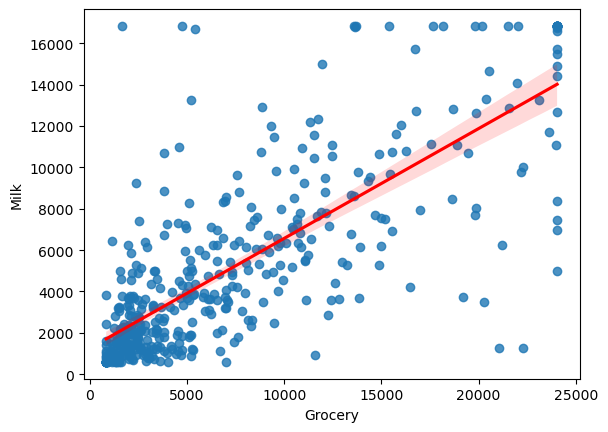

In [313]:
# visualize relationship between Grocery and Milk
sns.regplot(df,x='Grocery',y='Milk',line_kws= dict(color="r"))

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

b:\LHL\python\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
b:\LHL\python\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
b:\LHL\python\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
b:\LHL\python\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

Text(0, 0.5, 'iterrations')

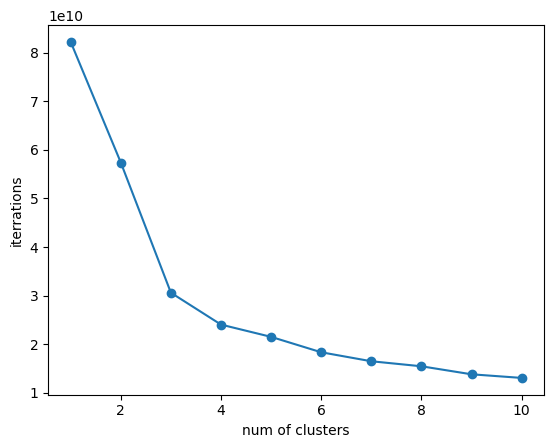

In [314]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
iterrations = []


for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state=3)
    kmeans.fit(df)
    iterrations.append(kmeans.inertia_)

plt.plot(range(1,11),iterrations, marker='o')
plt.xlabel('num of clusters')
plt.ylabel('iterrations')

In [315]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)


b:\LHL\python\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [316]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

<function matplotlib.pyplot.show(close=None, block=None)>

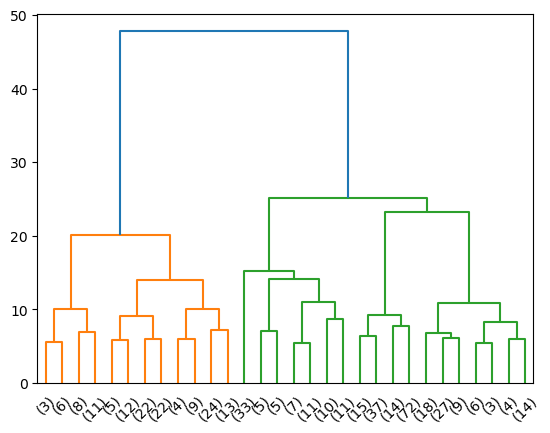

In [ ]:
sc = StandardScaler()
df_scaled=sc.fit_transform(df)


linkage_data= linkage(df_scaled, method='ward',metric='euclidean')
dendrogram(linkage_data, truncate_mode='lastp')
plt.show

In [318]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [326]:
nums_clusters = 3
cluster_labels = fcluster(linkage_data, nums_clusters, criterion='maxclust')
df['Hier_cluster'] = cluster_labels
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Hier_cluster
0,2,3,12669.0,9656.0,7561.00,214.00,2674.0,1338.00,1
1,2,3,7057.0,9810.0,9568.00,1762.00,3293.0,1776.00,1
2,2,3,6353.0,8808.0,7684.00,2405.00,3516.0,4485.40,1
3,1,3,13265.0,1196.0,4221.00,6404.00,507.0,1788.00,2
4,2,3,22615.0,5410.0,7198.00,3915.00,1777.0,4485.40,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703.0,12051.0,16027.00,9930.75,182.0,2204.00,2
436,1,3,36818.5,1431.0,851.45,4510.00,93.0,2346.00,2
437,2,3,14531.0,15488.0,24033.50,437.00,12043.2,1867.00,1
438,1,3,10290.0,1981.0,2232.00,1038.00,168.0,2125.00,3


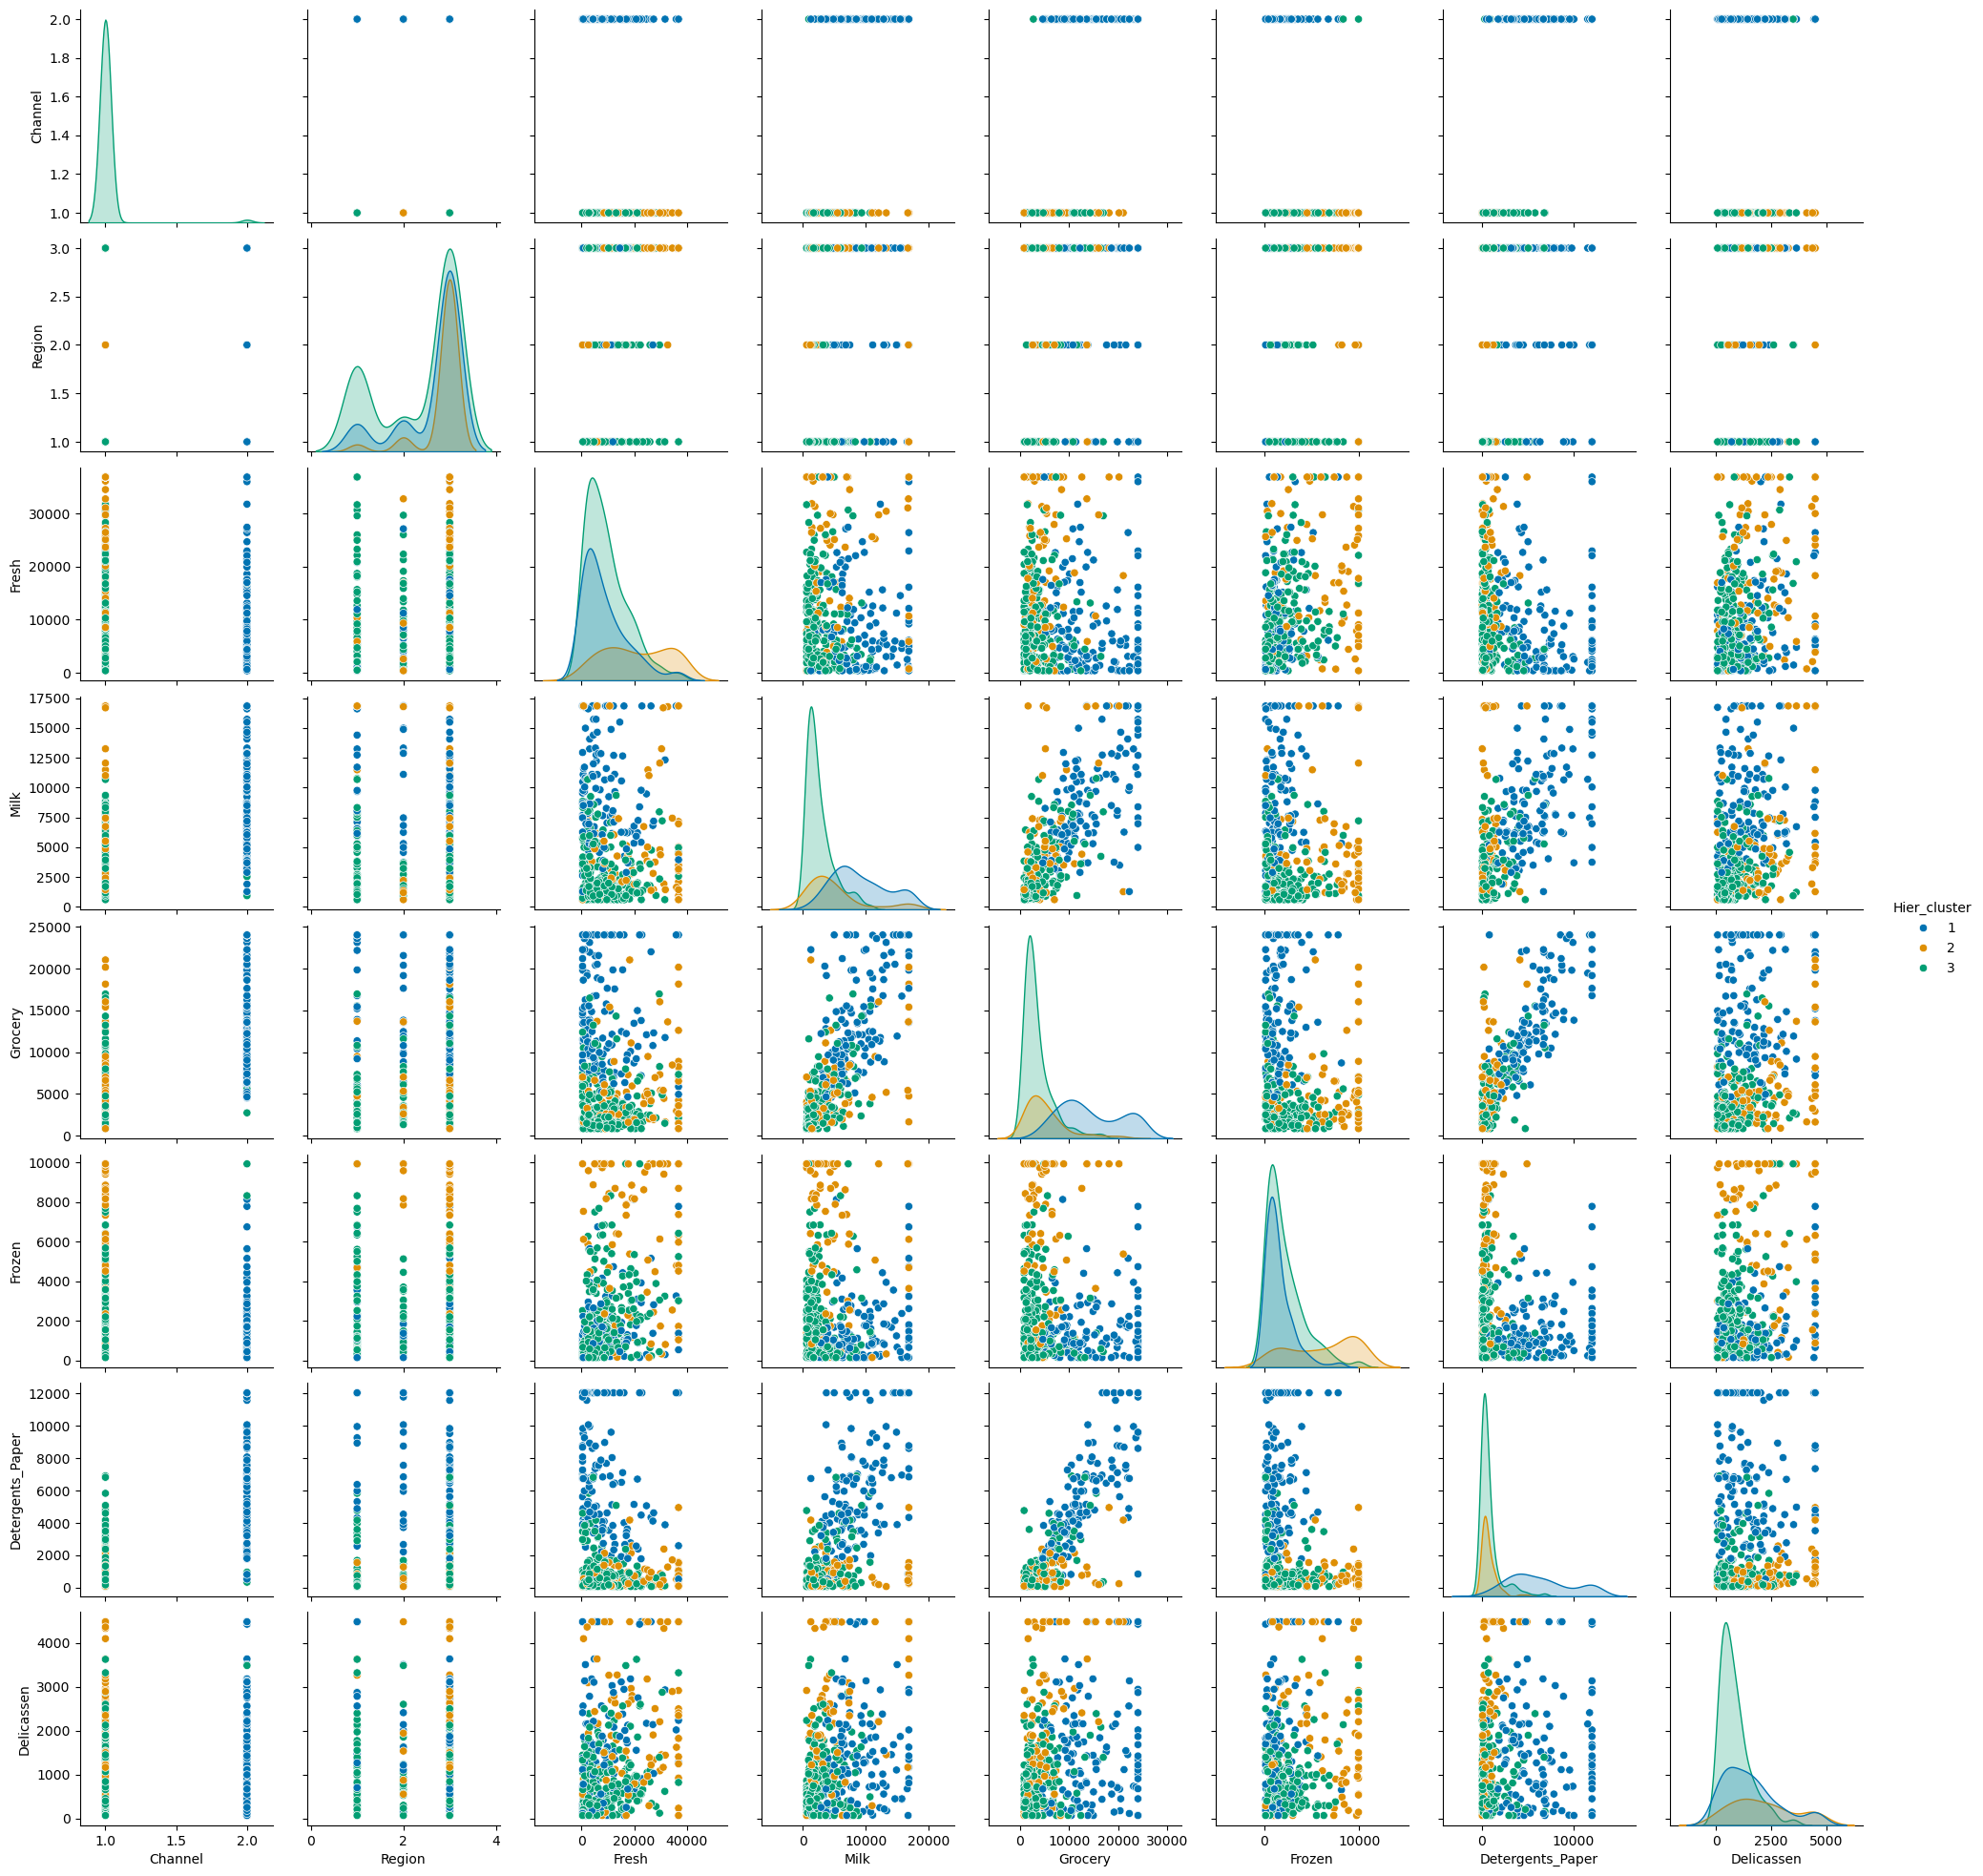

In [351]:
sns.pairplot(df, hue='Hier_cluster', palette='colorblind')

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [329]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Hier_cluster
0,2,3,12669.0,9656.0,7561.00,214.00,2674.0,1338.00,1
1,2,3,7057.0,9810.0,9568.00,1762.00,3293.0,1776.00,1
2,2,3,6353.0,8808.0,7684.00,2405.00,3516.0,4485.40,1
3,1,3,13265.0,1196.0,4221.00,6404.00,507.0,1788.00,2
4,2,3,22615.0,5410.0,7198.00,3915.00,1777.0,4485.40,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703.0,12051.0,16027.00,9930.75,182.0,2204.00,2
436,1,3,36818.5,1431.0,851.45,4510.00,93.0,2346.00,2
437,2,3,14531.0,15488.0,24033.50,437.00,12043.2,1867.00,1
438,1,3,10290.0,1981.0,2232.00,1038.00,168.0,2125.00,3


In [336]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

new_df = df.drop(columns='Hier_cluster')
print(new_df)
# scale df
sc = StandardScaler()
data_scaled = sc.fit_transform(new_df)

data_scaled


     Channel  Region    Fresh     Milk   Grocery   Frozen  Detergents_Paper  \
0          2       3  12669.0   9656.0   7561.00   214.00            2674.0   
1          2       3   7057.0   9810.0   9568.00  1762.00            3293.0   
2          2       3   6353.0   8808.0   7684.00  2405.00            3516.0   
3          1       3  13265.0   1196.0   4221.00  6404.00             507.0   
4          2       3  22615.0   5410.0   7198.00  3915.00            1777.0   
..       ...     ...      ...      ...       ...      ...               ...   
435        1       3  29703.0  12051.0  16027.00  9930.75             182.0   
436        1       3  36818.5   1431.0    851.45  4510.00              93.0   
437        2       3  14531.0  15488.0  24033.50   437.00           12043.2   
438        1       3  10290.0   1981.0   2232.00  1038.00             168.0   
439        1       3   2787.0   1698.0   2510.00   136.85             477.0   

     Delicassen  
0       1338.00  
1       1776.00

array([[ 1.44865163,  0.59066829,  0.13256052, ..., -0.88489169,
         0.03840537,  0.03242255],
       [ 1.44865163,  0.59066829, -0.4236408 , ..., -0.32545362,
         0.2240779 ,  0.40898867],
       [ 1.44865163,  0.59066829, -0.49341373, ..., -0.09307722,
         0.29096801,  2.73836822],
       ...,
       [ 1.44865163,  0.59066829,  0.31710201, ..., -0.80430081,
         2.84874972,  0.48722501],
       [-0.69029709,  0.59066829, -0.10322047, ..., -0.58710295,
        -0.71328346,  0.70903793],
       [-0.69029709,  0.59066829, -0.84683745, ..., -0.91277325,
        -0.62059717, -1.06292919]])

In [337]:
pca = PCA()
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

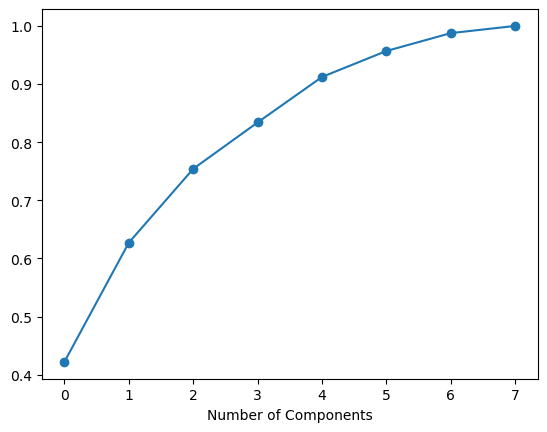

In [338]:
# plot nums of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.show()

In [340]:
new_df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [342]:
pca_df = pd.DataFrame(pca.components_, columns=new_df.columns)
pca_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.463350,0.014841,-0.103276,0.459504,0.510829,-0.124952,0.503883,0.181160
1,-0.095163,0.028950,0.571931,0.182648,0.059353,0.571065,-0.076246,0.542391
2,0.074201,0.978029,0.121782,-0.046109,-0.030470,-0.138097,-0.030636,-0.007646
3,0.159119,-0.164098,0.801207,-0.081120,0.063387,-0.354529,0.089058,-0.401994
4,0.072330,0.104425,-0.049022,0.045761,0.119876,0.692773,0.171579,-0.674998
5,0.698730,-0.055058,-0.027462,-0.638871,-0.148736,0.182999,0.059747,0.201628
6,0.495553,-0.038467,-0.015909,0.558077,-0.407126,0.003266,-0.512535,-0.113093
7,0.079985,-0.007519,-0.045331,-0.158395,0.726870,-0.008666,-0.660089,-0.047634


In [352]:
pca_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.243513,0.107638,0.156740,0.040187,0.111748,0.102982,-0.056905,-0.040023
std,0.274021,0.360022,0.338792,0.375515,0.358588,0.361575,0.373037,0.375535
min,-0.095163,-0.164098,-0.103276,-0.638871,-0.407126,-0.354529,-0.660089,-0.674998
25%,0.073733,-0.042614,-0.046253,-0.100439,-0.060036,-0.128238,-0.185318,-0.185319
50%,0.119552,0.003661,-0.021685,-0.000174,0.061370,-0.002700,0.014556,-0.027640
75%,0.471401,0.047819,0.234319,0.251862,0.217615,0.280016,0.109688,0.186277
max,0.698730,0.978029,0.801207,0.558077,0.726870,0.692773,0.503883,0.542391


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Folks tend to staples such as detergents/paper goods and groceries together

2. Cluster 2 appears to buy both fresh and frozen goods at the same time more than the other clusters

3. Overall, fresh and frozen goods are rarely bought together

4. Culster 2 doesn't buy much detergents/paper goods at all